# Week 9

## Quiz 

1.  What command is used to produce a list of the keys in a dictionary (call it dict1)?

2.  Write code to loop through a dictionary and print the values.

3.  Consider a dictionary (call it dict2).  How would you add a new key/value pair to it?

4.  In a district map, how can you detect if a census block is on the border of its district?

### Answers

In [ ]:
dict1.keys()

In [ ]:
for value in dict1.values():
    print(value)
    
for key in dict1.keys():
    print(dict1[key])

In [ ]:
dict2[new_key] = new_value

## Notes

In [1]:
from redistricting import *
import matplotlib.pyplot as plt
from matplotlib import colors

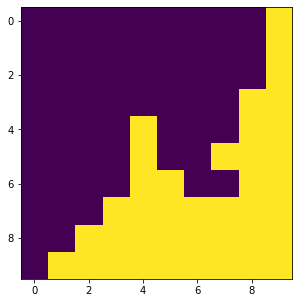

In [2]:
dist_map = np.zeros((10,10))
dist_map[5:,7:] = np.ones((5,3))
dist_map[8:,2:] = np.ones((2,8))
dist_map[9,1:] = np.ones((1,9))
dist_map[7,3:] = np.ones((1,7))
dist_map[4:,4] = np.ones((1,6))
dist_map[6,5] = 1
dist_map[6,7] = 0
dist_map[3:,8:] = np.ones((7,2))
dist_map[:,9] = np.ones((1,10))
plt.figure(figsize=(5,5))
plt.imshow(dist_map)
plt.show()

### Calculate perimeter

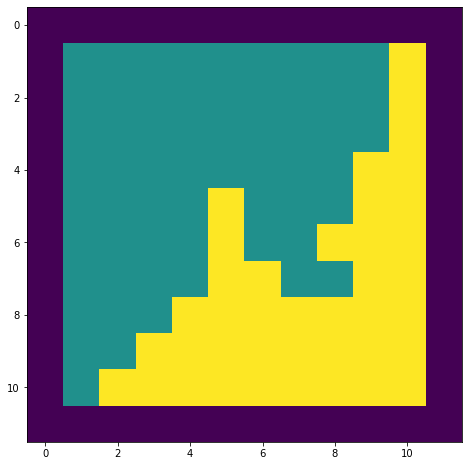

In [3]:
framed_map = np.ones((12,12))*(-1)
framed_map[1:11,1:11] = dist_map
plt.figure(figsize=(8,8))
plt.imshow(framed_map)
plt.show()

In [4]:
perimeter = 0
for i,j in [(i,j) for i in range(1,11) for j in range(1,11) if framed_map[i,j] == 1]:
    neighbors = [framed_map[i-1,j],framed_map[i+1,j],framed_map[i,j-1],framed_map[i,j+1]]
    other_dist = []
    for neighbor in neighbors:
        if not neighbor == 1:
            other_dist.append(neighbor)
    perimeter += len(other_dist)
perimeter

46

In [6]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


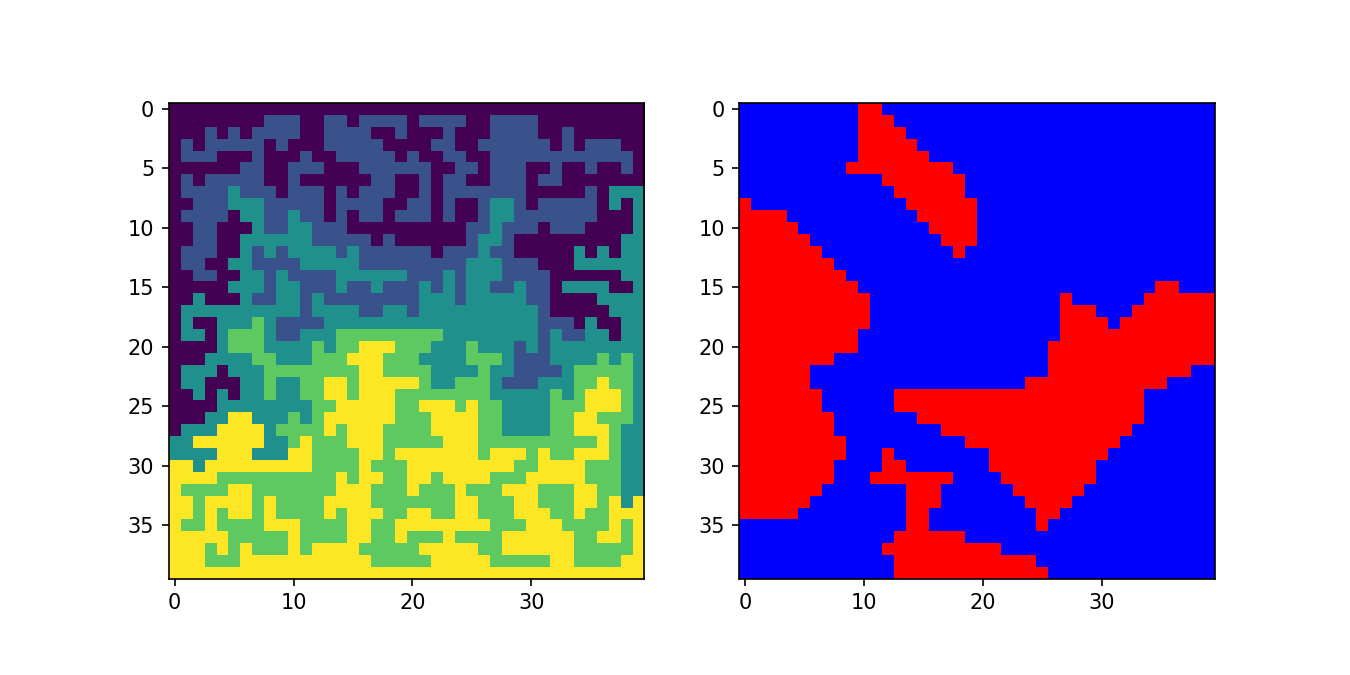

In [7]:
vote_map = GenerateVoteMap(200,0.60)
dist_map = GenerateDistMap(vote_map,5)
dist_dict = GenerateDistrictDictionary(dist_map,vote_map)

fig = plt.figure(figsize = (9,4.5))
ax = plt.subplot(121)
im = ax.imshow(dist_map)
plt.subplot(122)
plt.imshow(vote_map,cmap=colors.ListedColormap(['red','blue']))

def animate(i):
    global dist_map
    global dist_dict

    dist_map,dist_dict = SimulateRedistricting(dist_map,dist_dict,vote_map,0.9)
    im.set_data(dist_map)
    return im

anim = FuncAnimation(fig=fig, func=animate, interval=10, blit=True, repeat=False)
plt.show()